In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,t

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50)

## STEP-01
**Alternate Hypothesis (Bold claim)**: $ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $

**Null Hypothesis (Status Quo)**: $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

## STEP-02

* Collect the Sample Size of N

* Collect the Mean from this Sample $\bar{x} $

## STEP-03

**Compute test static based on the data :**

* If population variance is known.

$$z=\frac{\bar x-\mu}{\frac{\sigma}{^2\sqrt n}}$$

* If population variance is not known.

$$z = \frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}$$

## STEP-04
**Decide the value of $\alpha$.The lower the $\alpha$ the more the chance to reject null hypothesis.**

## STEP-05

 * **For t-test:**
  * Two tailed t_test:
  $|t|>t_n-1,\frac{\alpha}{2} \Rightarrow$  Accept $H_1$  or Reject $H_0$
  * Right tailed t_test:
  $t>t_n-1,\alpha \Rightarrow$  Accept $H_1$ or Reject $H_0$

  * Left tailed t_test:
  $t<t_n-1,\alpha \Rightarrow$  Accept $H_1$ or Reject $H_0$

##STEP-06

** Calculate P-Value
* For two tailed test:
$$ p-value=2*(1.0-cd f(test statistic)) $$
* For one tailed test:
$$p-value=(1.0-cd f(test statistic)) $$
Now,
$if(p-value<\alpha) \Rightarrow$ Accept $H_1$ or Reject $H_0 $

In [2]:
def t_score(sample_size, sample_mean, pop_mean, se):
  numerator = sample_mean - pop_mean
  denomenator = se / sample_size**0.5
  return numerator / denomenator

**Calculate standard deviation**

In [33]:
def standard_deviation(data):
  a = len(data)
  b = sum(data)
  c = sum(data)/len(data)
  d = 0
  std = 0
  for i in data:
    variance = (i-c)**2
    d+=variance
  std = (d/a)**0.5
  return std

**Calculate Sample Mean**

In [34]:


l=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sum(l)/len(l)



465.3

**Calculate t-critical**

In [35]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df =9)

print(t_critical)

2.2621571627409915


In [36]:
standard_deviation(l)

82.3918078451978

**Data Values**

In [39]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
se = 82.39180

**Calculate t-score**

In [49]:
t = t_score(sample_size, sample_mean, pop_mean,se)

print(t)

-1.3318198510997785


In [9]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Plotting the graph**

Text(465.3, 0.0007, 'x_bar')

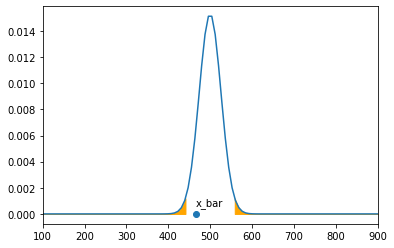

In [41]:

x_min=100
x_max=900

mean=pop_mean
std=se/sample_size**0.5

# Ploting the graph and setting the x limits
x=np.linspace(x_min,x_max,100)
y=norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


**Calculate p-value**

In [50]:
p_value = 2 * (1.0 - norm.cdf(abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18291939318218664
Fail to reject Null Hypothesis


Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)

**Calculate the sample Mean**

In [42]:
l2=[2,3,5,4,3,2,4,5,5,3,2,4,4,5,5,5,3,2,2,1]
z = np.mean(l2)
print(z)

3.45


**Compute one tail test based on $H_0$ and $H_1$.Keep the signiface level as $\alpha=0.95$

In [51]:
#ONE_TAIL_TEST
from scipy.stats import t

confidence_leve_2=0.95
alpha_2=1-confidence_leve_2
t_critical_2=t.ppf(1-alpha_2, df = 9)
print(t_critical_2)

1.8331129326536335


In [52]:
standard_deviation(l2)

1.2835497652993437

In [53]:
sample_size_2 = 20
sample_mean_2 = 3.45
pop_mean_2 = 4
sample_std_2 = 1.2835497652993437

In [57]:
t_2=t_score(sample_mean_2,pop_mean_2,sample_std_2,sample_size_2)
print(t_2)

0.2522791186252744


Text(3.45, 0.1, 'x_bar')

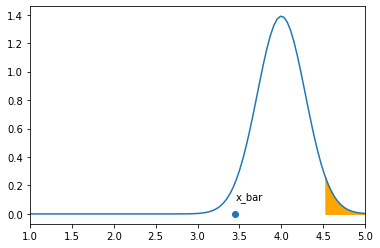

In [55]:
x_min_2=1
x_max_2=5

#Defining the sampling distribution mean and sampling distribution std
mean_2=pop_mean_2
std_2=sample_std_2/(sample_size_2**0.5)

#Plotting the graph and setting the x limits
x_2=np.linspace(x_min_2,x_max_2,100)
y_2=norm.pdf(x_2,mean_2,std_2)
plt.xlim(x_min_2,x_max_2)
plt.plot(x_2,y_2)

#Computing the critical right value(Right tailed test)
t_critical_right_2=pop_mean_2+(t_critical_2*std_2)

#Shading the right rejection region
x2=np.linspace(t_critical_right_2,x_max_2,100)
y2=norm.pdf(x2,mean_2,std_2)
plt.fill_between(x2,y2,color='orange')

#Plotting the sample mean and concuding the results
plt.scatter(sample_mean_2,0)
plt.annotate("x_bar",(sample_mean_2,0.1))

#In this case the sample mean does not fall in the rejection region
#i.e. here we fail to reject he null hypothesis

In [56]:
if(t_2 > t_critical_2):
    print("Reject the Null Hypotehsis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


**Calculate p-value**

In [58]:
p_value = 2 * (1.0 - norm.cdf(abs(t_2)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.8008253271758552
Fail to reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)

**Calculate Sample Mean**

In [59]:
l_3=[14.8,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.4,15.46,13.88,14.31,14.41,15.7,15.38]
sum(l_3)/len(l_3)

15.130499999999998

In [60]:
confidence_leve_3=0.95
alpha_3=1-confidence_leve_3
t_critical_3=t.ppf(1-alpha_3,df=19)
print(t_critical_3)


1.729132811521367


In [61]:
standard_deviation(l_3)

0.9724375301272571

In [62]:
sample_size_3=20
sample_mean_3=15.130499999999998
pop_mean_3=15
sample_std_3=0.9724375301272571


**Calculate t-value**

In [22]:
t_3=t_score(sample_mean_3,pop_mean_3,sample_std_3,sample_size_3)
print(t_3)

2.7282166542895565


**PLotting the graph**

Text(15.130499999999998, 0.1, 'x_bar')

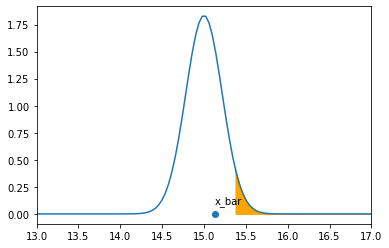

In [63]:

x_min_3=13
x_max_3=17

mean_3=pop_mean_3
std_3=sample_std_3/(sample_size_3**0.5)

x_3=np.linspace(x_min_3,x_max_3,100)
y_3=norm.pdf(x_3,mean_3,std_3)

plt.xlim(x_min_3,x_max_3)
plt.plot(x_3,y_3)

t_critical_right_3=pop_mean_3+(t_critical_3*std_3)

x3=np.linspace(t_critical_right_3,x_max_3,100)
y3=norm.pdf(x3,mean_3,std_3)
plt.fill_between(x3,y3,color='orange')

plt.scatter(sample_mean_3,0)
plt.annotate("x_bar",(sample_mean_3,0.1))

In [64]:
if (t_3> t_critical_3):
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


**Calculate p-value**|

In [65]:
p_value = 2 * (1.0 - norm.cdf(abs(t_3)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006367776985112927
Reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)

In [25]:
from numpy import random
x=random.randint(95,105, size=(100))
l_4=list(x)
l_4[:20]

[100,
 95,
 97,
 95,
 103,
 96,
 97,
 104,
 104,
 99,
 101,
 95,
 99,
 104,
 95,
 101,
 101,
 104,
 99,
 98]

In [26]:
sum(l_4)/len(l_4)

99.89

In [27]:
confidence_leve_4=0.99
alpha_4=1-confidence_leve_4
t_critical_4=t.ppf(1-alpha_4,df=99)
print(t_critical_4)


2.3646058614359737


In [28]:
standard_deviation(l_4)

2.921968514546314

In [29]:
sample_size_4=100
sample_mean_4=99.25
pop_mean_4=100
sample_std_4=2.7472713735632306

**Calculate the t-score value**

In [66]:
t_4=t_score(sample_mean_4,pop_mean_4,sample_std_4,sample_size_4)
print(t_4)

9.688734450947502


**PLotting the graph**

Text(99.25, 0.02, 'x_bar')

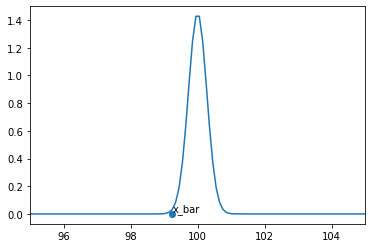

In [67]:

x_min_4=95
x_max_4=105

mean_4=pop_mean_4
std_4=sample_std_4/(sample_size_4**0.5)

x4=np.linspace(x_min_4,x_max_4,100)
y4=norm.pdf(x4,mean_4,std_4)

plt.xlim(x_min_4,x_max_4)
plt.plot(x4,y4)

t_critical_left_4=pop_mean_4+(-t_critical_4*std)

x4=np.linspace(x_min_4,t_critical_left_4,100)
y4=norm.pdf(x4,mean_4,std_4)
plt.fill_between(x4,y4,color='orange')

plt.scatter(sample_mean_4,0)
plt.annotate("x_bar",(sample_mean_4,0.02))

In [68]:

if(t_4<t_critical_4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


**Calculate p-value**

In [69]:
p_value = 2 * (1.0 - norm.cdf(abs(t_4)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis
